In [ ]:
# Kuraloviya K [ Amazon_Sales-Analysis ]

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [15]:
df=pd.read_csv('Amazon Sale Report.csv',encoding= 'unicode_escape')

In [3]:
df.shape

(128976, 21)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [16]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
pd.isnull(df) 
# checking null value 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
pd.isnull(df).sum()
# sum will give total values of null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [11]:
#drop null values
df.dropna(inplace=True)

In [12]:
df.shape

(37514, 19)

In [17]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [20]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('float64')

In [23]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [25]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


In [26]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,128976.000000,121176.000000
mean,0.904401,648.562176
std,0.313368,281.185041
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [27]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

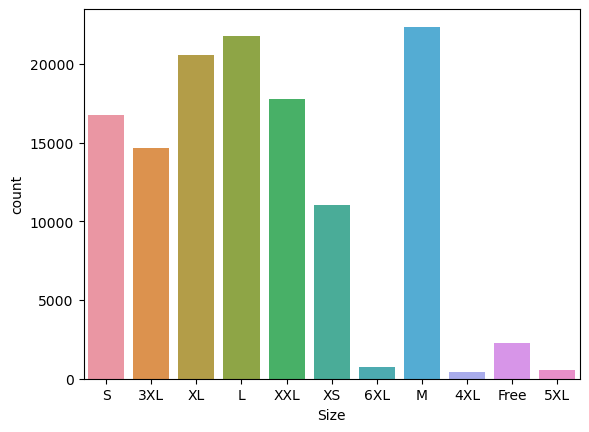

In [28]:
ax=sns.countplot(x='Size' ,data=df)

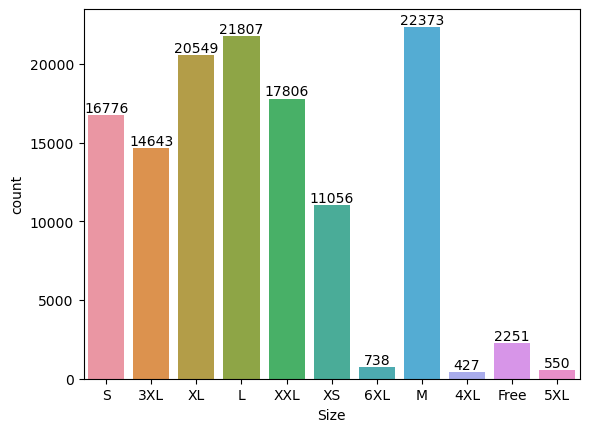

In [29]:
ax=sns.countplot(x='Size' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20138
5,L,19706
8,XL,18636
10,XXL,16246
7,S,15041
0,3XL,13360
9,XS,9850
4,Free,2070
3,6XL,688
2,5XL,513


<Axes: xlabel='Size', ylabel='Qty'>

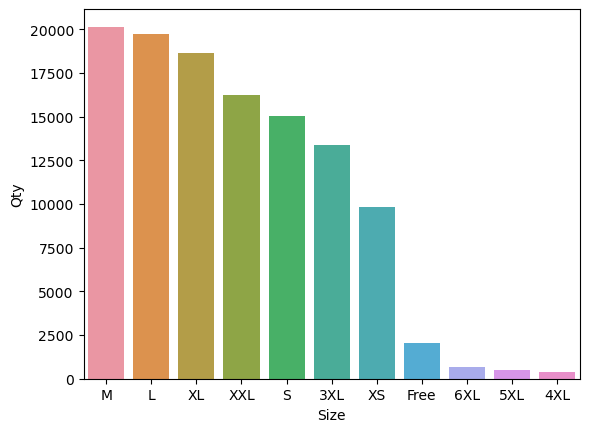

In [33]:
Size_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=Size_Qty)

<Axes: xlabel='Courier Status', ylabel='count'>

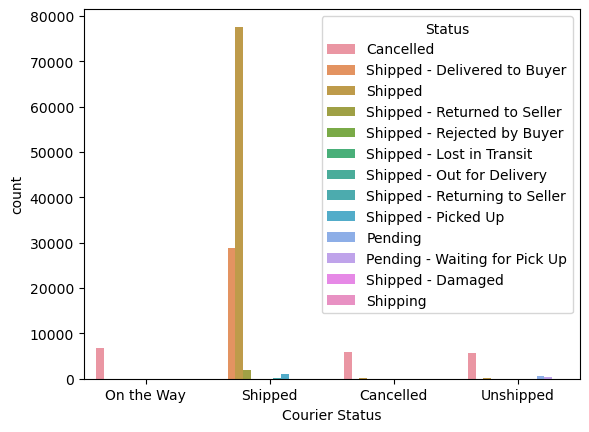

In [34]:
sns.countplot(data=df, x='Courier Status',hue= 'Status')

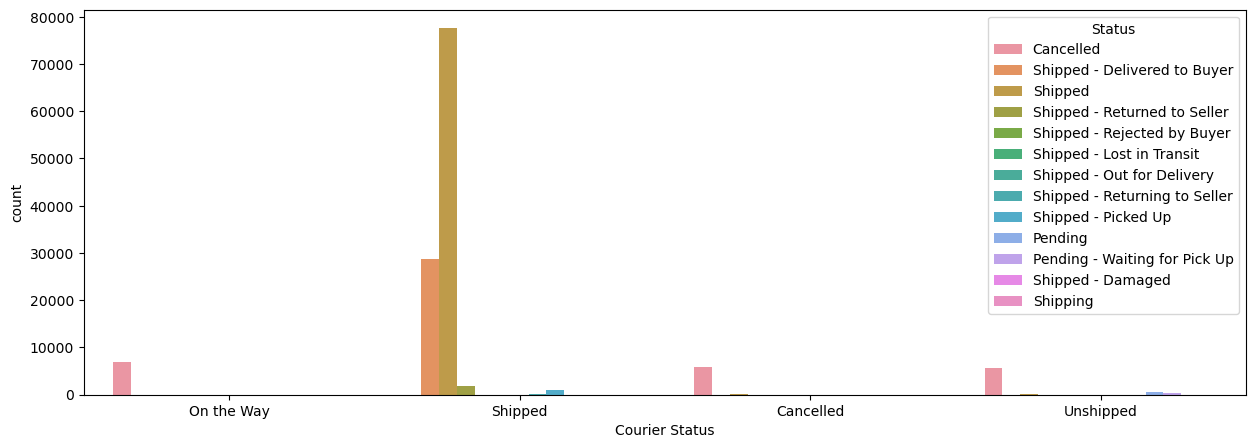

In [37]:
plt.figure(figsize=(15,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()

<Axes: >

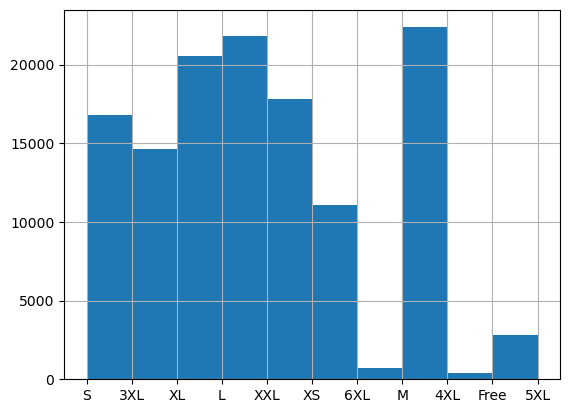

In [38]:
#histogram 
df['Size'].hist()

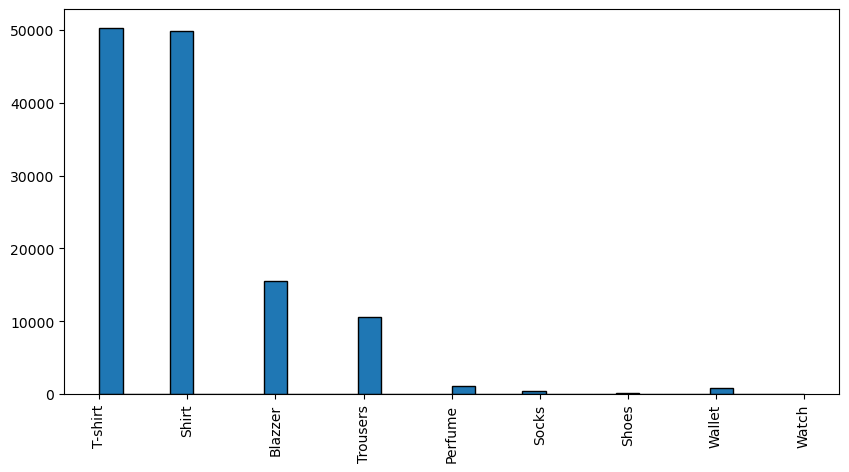

In [39]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

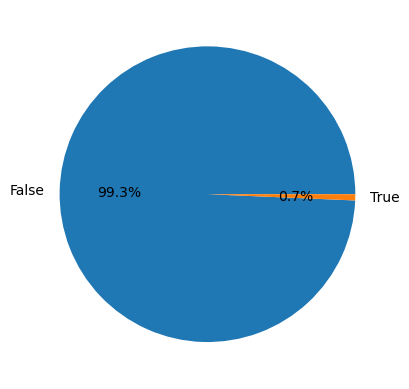

In [42]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
plt.show()

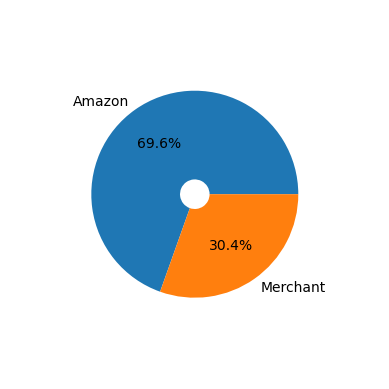

In [43]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

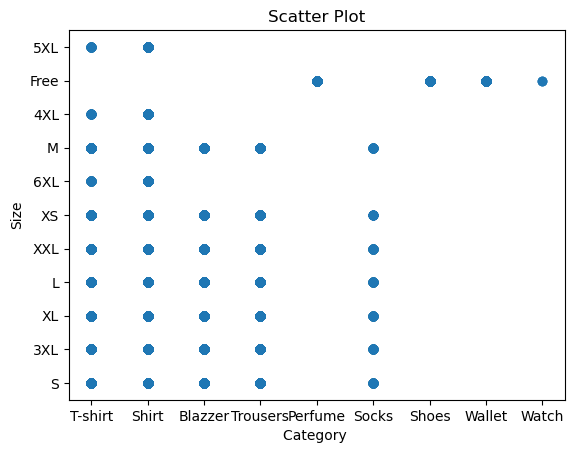

In [46]:
x_data = df['Category']  
y_data = df['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')  
plt.ylabel('Size')  
plt.title('Scatter Plot') 
plt.show()

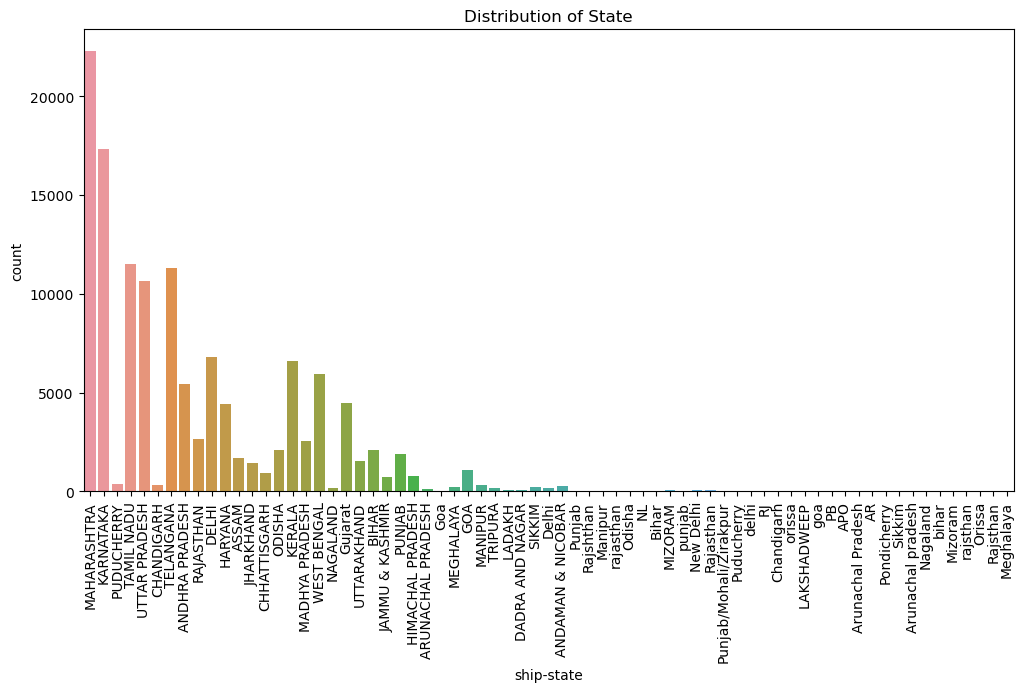

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

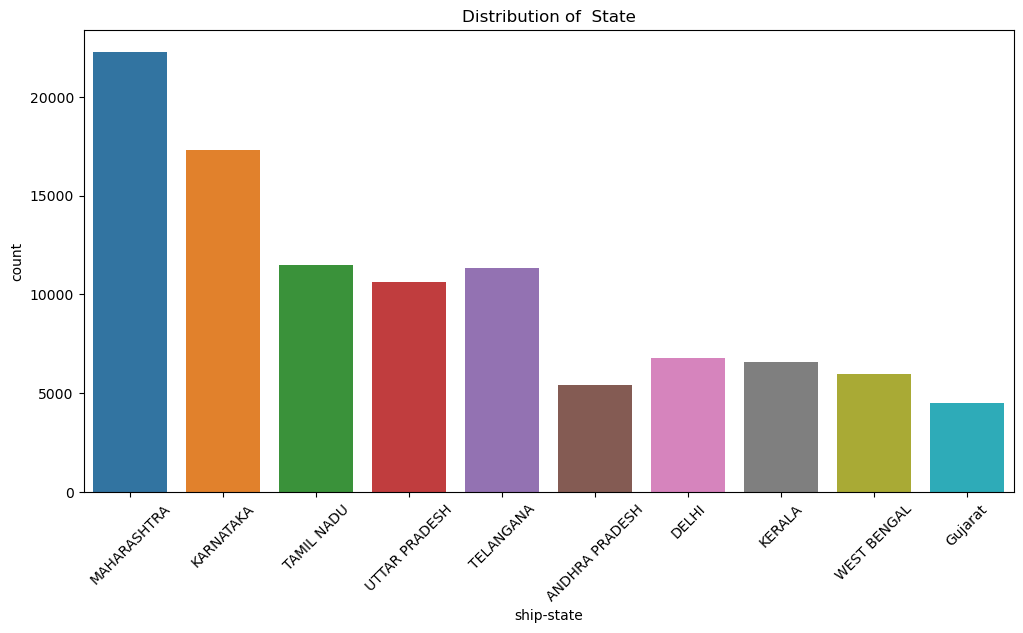

In [48]:
# top_10_States 
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()